In [145]:
import pandas as pd

# Sample-specific metadata 
date = "2024-09-08"

# Load the CSV file into a pandas DataFrame
file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 5 Raw Data.csv'; s_num = 5
# file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 6 Raw Data.csv'; s_num = 6
raw_df = pd.read_csv(file_path)

#load basel data for polaizer
h_file = "baselines/Polarized Batch 4 0% Samples  - Baseline Horizontal.csv"
v_file = "baselines/Polarized Batch 4 0% Samples  - Baseline Vertical.csv"

df_h = pd.read_csv(h_file)
df_v = pd.read_csv(v_file)

#add baseleine to df
raw_df['V_baseline'] = df_v['Average']
raw_df['H_baseline'] = df_h['Average']

raw_df

,Wavelength,0%,0%H,0%V,10%,10%H,10%V,20%,20%H,20%V,30%,30%H,30%V,V_baseline,H_baseline
0,300.0,0.207481,3.964294,3.814398,0.199845,4.000000,4.000000,0.197765,3.900951,4.000000,0.198394,4.000000,3.956099,4.000000,4.000000
1,300.5,0.206436,3.925951,3.883419,0.198816,3.978060,4.000000,0.196824,3.940001,3.978052,0.197359,4.000000,3.977175,3.973701,4.000000
2,301.0,0.205409,4.000000,3.967315,0.197741,3.983123,3.934429,0.195763,3.938575,3.916744,0.196380,3.941088,4.000000,3.994414,3.992867
3,301.5,0.204034,4.000000,4.000000,0.196587,3.958317,3.994425,0.194553,4.000000,3.961047,0.195174,4.000000,3.994481,3.980757,3.989014
4,302.0,0.202789,4.000000,3.970334,0.195449,3.976173,3.994171,0.193431,4.000000,4.000000,0.194044,4.000000,3.982280,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.082769,0.153253,0.246045,0.083957,0.154242,0.246253,0.085763,0.156730,0.248474,0.088380,0.159231,0.250687,0.165349,0.072880
1197,898.5,0.082817,0.152816,0.245063,0.083969,0.153760,0.245212,0.085782,0.156077,0.247410,0.088408,0.158396,0.249385,0.163506,0.072257
1198,899.0,0.082954,0.151840,0.243357,0.084069,0.152884,0.243496,0.085890,0.155242,0.245611,0.088487,0.157719,0.247464,0.161557,0.071873
1199,899.5,0.083011,0.151709,0.241521,0.084119,0.152730,0.241686,0.085936,0.155145,0.243771,0.088572,0.157617,0.245747,0.159992,0.071622


4


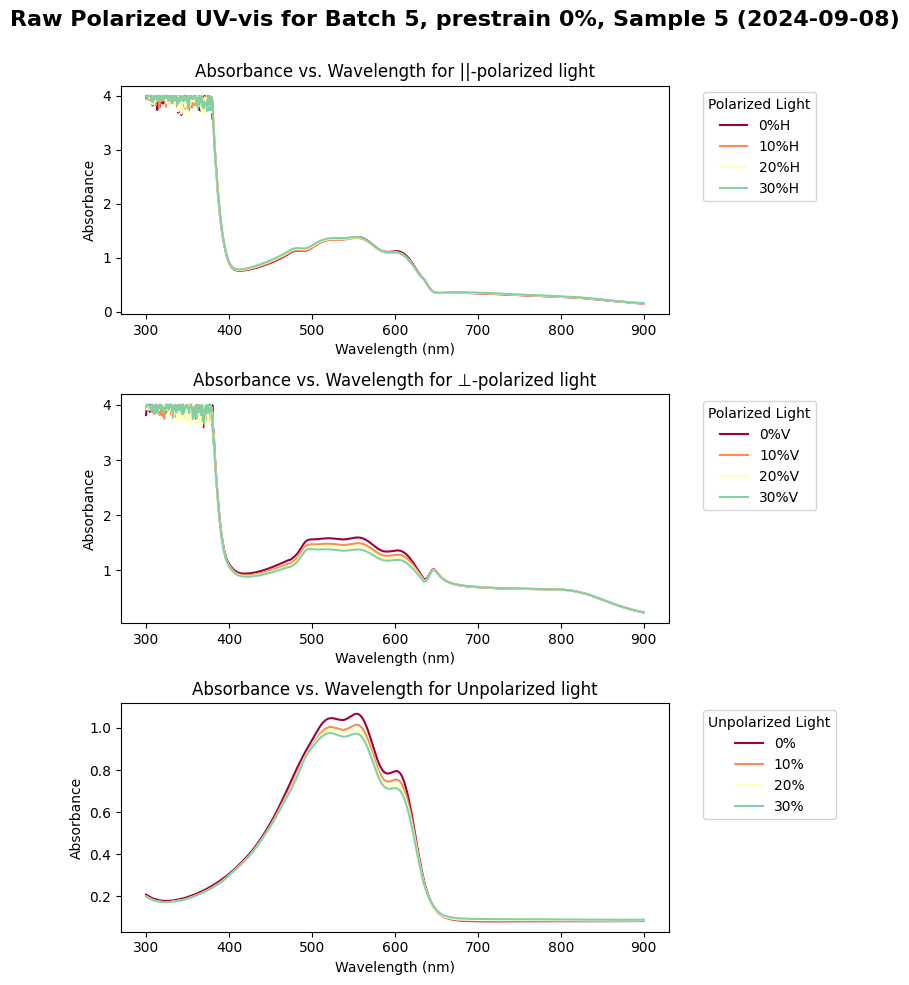

In [146]:
##### plotting the raw data #####
df = raw_df
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Set up figure with 3 subplots for polarized and unpolarized UV-vis data
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
fig.suptitle(f'Raw Polarized UV-vis for Batch 5, prestrain 0%, Sample {s_num} ({date})\n', fontsize=16, fontweight='bold')

# Generate colors for plotting
colors = cm.Spectral([i / ((df.shape[1] - 3)//3) for i in range((df.shape[1] - 1)//3)])
print(((df.shape[1] - 3)//3))
# Plot Vertical Absorbance (columns with 'H' wichic are parrallel to strain)
for i, column in enumerate([col for col in df.columns if 'H' in col and 'baseline' not in col]):
    axs[0].plot(df['Wavelength'], df[column], label=column, color=colors[i])

axs[0].set_title('Absorbance vs. Wavelength for ||-polarized light')
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Absorbance')
# axs[0].set_xlim((400, 700))
# axs[0].set_ylim((0, 1.1))
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Horizontal Absorbance (columns with 'V' which are perp to strain)
for i, column in enumerate([col for col in df.columns if 'V' in col and 'baseline' not in col]):
    axs[1].plot(df['Wavelength'], df[column], label=column, color=colors[i])

axs[1].set_title('Absorbance vs. Wavelength for ⊥-polarized light')
axs[1].set_xlabel('Wavelength (nm)')
axs[1].set_ylabel('Absorbance')
# axs[1].set_xlim((400, 700))
# axs[1].set_ylim((0, 1.1))
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Unpolarized Absorbance (columns without 'H' or 'V')
for i, column in enumerate([col for col in df.columns if 'H' not in col and 'V' not in col and 'Wavelength' not in col and 'baseline' not in col]):
    axs[2].plot(df['Wavelength'], df[column], label=column, color=colors[i])

axs[2].set_title('Absorbance vs. Wavelength for Unpolarized light')
axs[2].set_xlabel('Wavelength (nm)')
axs[2].set_ylabel('Absorbance')
# axs[2].set_xlim((400, 700))
# axs[2].set_ylim((0, 1))
axs[2].legend(title='Unpolarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [147]:
# remoce bad data
if file_path == 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 6 Raw Data.csv':
    raw_df.drop(columns=[col for col in raw_df.columns if '10%' in col], inplace=True)
raw_df

,Wavelength,0%,0%H,0%V,10%,10%H,10%V,20%,20%H,20%V,30%,30%H,30%V,V_baseline,H_baseline
0,300.0,0.207481,3.964294,3.814398,0.199845,4.000000,4.000000,0.197765,3.900951,4.000000,0.198394,4.000000,3.956099,4.000000,4.000000
1,300.5,0.206436,3.925951,3.883419,0.198816,3.978060,4.000000,0.196824,3.940001,3.978052,0.197359,4.000000,3.977175,3.973701,4.000000
2,301.0,0.205409,4.000000,3.967315,0.197741,3.983123,3.934429,0.195763,3.938575,3.916744,0.196380,3.941088,4.000000,3.994414,3.992867
3,301.5,0.204034,4.000000,4.000000,0.196587,3.958317,3.994425,0.194553,4.000000,3.961047,0.195174,4.000000,3.994481,3.980757,3.989014
4,302.0,0.202789,4.000000,3.970334,0.195449,3.976173,3.994171,0.193431,4.000000,4.000000,0.194044,4.000000,3.982280,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.082769,0.153253,0.246045,0.083957,0.154242,0.246253,0.085763,0.156730,0.248474,0.088380,0.159231,0.250687,0.165349,0.072880
1197,898.5,0.082817,0.152816,0.245063,0.083969,0.153760,0.245212,0.085782,0.156077,0.247410,0.088408,0.158396,0.249385,0.163506,0.072257
1198,899.0,0.082954,0.151840,0.243357,0.084069,0.152884,0.243496,0.085890,0.155242,0.245611,0.088487,0.157719,0.247464,0.161557,0.071873
1199,899.5,0.083011,0.151709,0.241521,0.084119,0.152730,0.241686,0.085936,0.155145,0.243771,0.088572,0.157617,0.245747,0.159992,0.071622


In [148]:
### resscale data to 0 -> 1 ###
# define function to normalize the uv-vis data which ranges from -4 to 4
rescale_absorbance = lambda absorbance_data: (absorbance_data + 4) * (1 / 8)
df_rescaled = raw_df.copy()
# Apply the normalization to all columns except the 'Wavelength' column
df_rescaled.iloc[:, 1:] = df_rescaled.iloc[:, 1:].apply(rescale_absorbance)
df_rescaled

,Wavelength,0%,0%H,0%V,10%,10%H,10%V,20%,20%H,20%V,30%,30%H,30%V,V_baseline,H_baseline
0,300.0,0.525935,0.995537,0.976800,0.524981,1.000000,1.000000,0.524721,0.987619,1.000000,0.524799,1.000000,0.994512,1.000000,1.000000
1,300.5,0.525805,0.990744,0.985427,0.524852,0.997258,1.000000,0.524603,0.992500,0.997256,0.524670,1.000000,0.997147,0.996713,1.000000
2,301.0,0.525676,1.000000,0.995914,0.524718,0.997890,0.991804,0.524470,0.992322,0.989593,0.524547,0.992636,1.000000,0.999302,0.999108
3,301.5,0.525504,1.000000,1.000000,0.524573,0.994790,0.999303,0.524319,1.000000,0.995131,0.524397,1.000000,0.999310,0.997595,0.998627
4,302.0,0.525349,1.000000,0.996292,0.524431,0.997022,0.999271,0.524179,1.000000,1.000000,0.524255,1.000000,0.997785,1.000000,0.999098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.510346,0.519157,0.530756,0.510495,0.519280,0.530782,0.510720,0.519591,0.531059,0.511047,0.519904,0.531336,0.520669,0.509110
1197,898.5,0.510352,0.519102,0.530633,0.510496,0.519220,0.530652,0.510723,0.519510,0.530926,0.511051,0.519799,0.531173,0.520438,0.509032
1198,899.0,0.510369,0.518980,0.530420,0.510509,0.519111,0.530437,0.510736,0.519405,0.530701,0.511061,0.519715,0.530933,0.520195,0.508984
1199,899.5,0.510376,0.518964,0.530190,0.510515,0.519091,0.530211,0.510742,0.519393,0.530471,0.511072,0.519702,0.530718,0.519999,0.508953


4


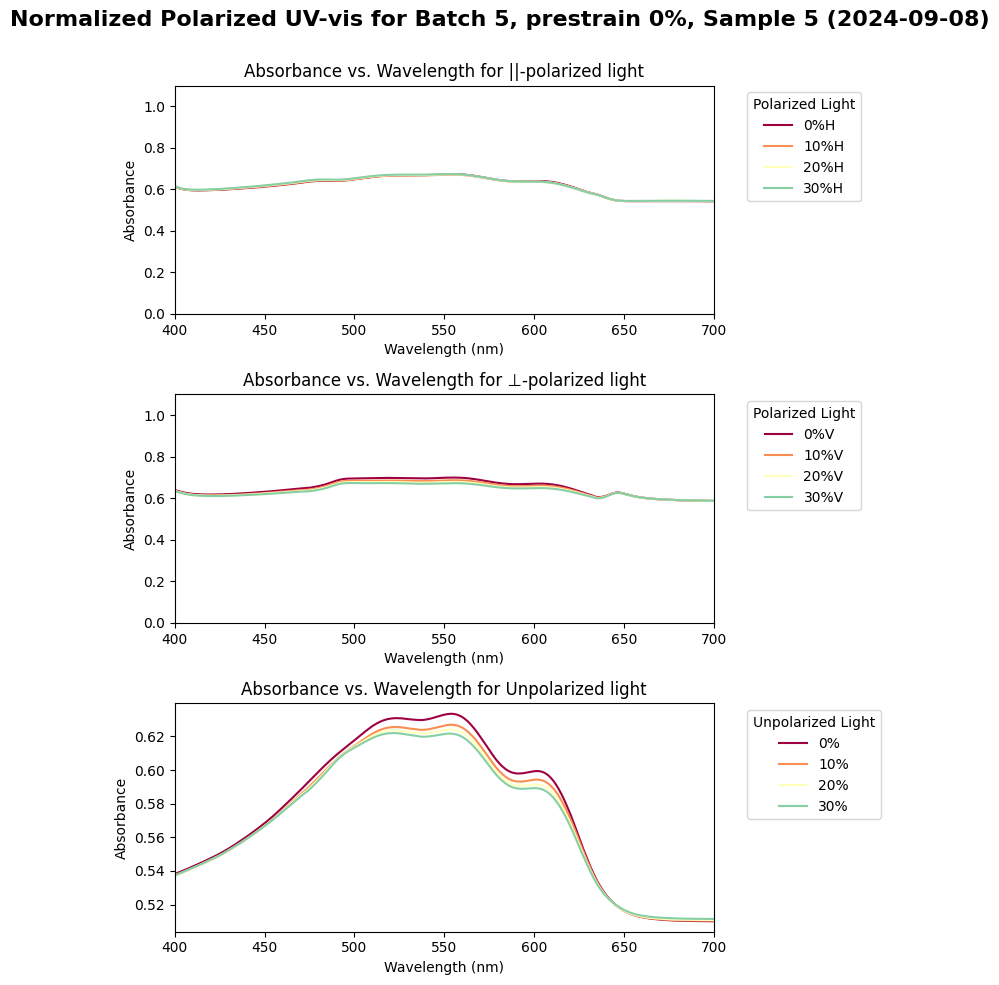

In [149]:
##### plotting #####
df = df_rescaled
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Set up figure with 3 subplots for polarized and unpolarized UV-vis data
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
fig.suptitle(f'Normalized Polarized UV-vis for Batch 5, prestrain 0%, Sample {s_num} ({date})\n', fontsize=16, fontweight='bold')

# Generate colors for plotting
colors = cm.Spectral([i / ((df.shape[1] - 3)//3) for i in range((df.shape[1] - 1)//3)])
print(((df.shape[1] - 3)//3))
# Plot Vertical Absorbance (columns with 'H' wichic are parrallel to strain)
for i, column in enumerate([col for col in df.columns if 'H' in col and 'baseline' not in col]):
    axs[0].plot(df['Wavelength'], df[column], label=column, color=colors[i])

axs[0].set_title('Absorbance vs. Wavelength for ||-polarized light')
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Absorbance')
axs[0].set_xlim((400, 700))
axs[0].set_ylim((0, 1.1))
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Horizontal Absorbance (columns with 'V' which are perp to strain)
for i, column in enumerate([col for col in df.columns if 'V' in col and 'baseline' not in col]):
    axs[1].plot(df['Wavelength'], df[column], label=column, color=colors[i])

axs[1].set_title('Absorbance vs. Wavelength for ⊥-polarized light')
axs[1].set_xlabel('Wavelength (nm)')
axs[1].set_ylabel('Absorbance')
axs[1].set_xlim((400, 700))
axs[1].set_ylim((0, 1.1))
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Unpolarized Absorbance (columns without 'H' or 'V')
for i, column in enumerate([col for col in df.columns if 'H' not in col and 'V' not in col and 'Wavelength' not in col and 'baseline' not in col]):
    axs[2].plot(df['Wavelength'], df[column], label=column, color=colors[i])

axs[2].set_title('Absorbance vs. Wavelength for Unpolarized light')
axs[2].set_xlabel('Wavelength (nm)')
axs[2].set_ylabel('Absorbance')
axs[2].set_xlim((400, 700))
# axs[2].set_ylim((0, 1))
axs[2].legend(title='Unpolarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [150]:
#### baseline correction ####
df = df_rescaled.copy()
for i, column in enumerate([col for col in df.columns if 'H' in col and 'baseline' not in col]):
    print(column)
    df[column] = 1 - ((1 - df[column].values) / (1 - df['H_baseline'].values))

for i, column in enumerate([col for col in df.columns if 'V' in col and 'baseline' not in col]):
    print(column)
    df[column] = 1 - ((1 - df[column].values) / (1 - df['V_baseline'].values))

df

0%H
10%H
20%H
30%H
0%V
10%V
20%V
30%V


/var/folders/fk/t_9tfggd6x977_5v6w6xbwl80000gn/T/ipykernel_52000/3699915682.py:5: RuntimeWarning: divide by zero encountered in divide
  df[column] = 1 - ((1 - df[column].values) / (1 - df['H_baseline'].values))
/var/folders/fk/t_9tfggd6x977_5v6w6xbwl80000gn/T/ipykernel_52000/3699915682.py:5: RuntimeWarning: invalid value encountered in divide
  df[column] = 1 - ((1 - df[column].values) / (1 - df['H_baseline'].values))
/var/folders/fk/t_9tfggd6x977_5v6w6xbwl80000gn/T/ipykernel_52000/3699915682.py:9: RuntimeWarning: divide by zero encountered in divide
  df[column] = 1 - ((1 - df[column].values) / (1 - df['V_baseline'].values))
/var/folders/fk/t_9tfggd6x977_5v6w6xbwl80000gn/T/ipykernel_52000/3699915682.py:9: RuntimeWarning: invalid value encountered in divide
  df[column] = 1 - ((1 - df[column].values) / (1 - df['V_baseline'].values))


,Wavelength,0%,0%H,0%V,10%,10%H,10%V,20%,20%H,20%V,30%,30%H,30%V,V_baseline,H_baseline
0,300.0,0.525935,-inf,-inf,0.524981,NaN,NaN,0.524721,-inf,NaN,0.524799,NaN,-inf,1.000000,1.000000
1,300.5,0.525805,-inf,-3.432957,0.524852,-inf,1.000000,0.524603,-inf,0.165434,0.524670,NaN,0.132086,0.996713,1.000000
2,301.0,0.525676,1.000000,-4.851549,0.524718,-1.366156,-10.739084,0.524470,-7.611786,-13.905204,0.524547,-7.259463,1.000000,0.999302,0.999108
3,301.5,0.525504,1.000000,1.000000,0.524573,-2.794308,0.710289,0.524319,1.000000,-1.024237,0.524397,1.000000,0.713199,0.997595,0.998627
4,302.0,0.525349,1.000000,-inf,0.524431,-2.302120,-inf,0.524179,1.000000,NaN,0.524255,1.000000,-inf,1.000000,0.999098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.510346,0.020466,0.021044,0.510495,0.020718,0.021098,0.510720,0.021352,0.021677,0.511047,0.021988,0.022254,0.520669,0.509110
1197,898.5,0.510352,0.020510,0.021258,0.510496,0.020751,0.021297,0.510723,0.021341,0.021870,0.511051,0.021931,0.022385,0.520438,0.509032
1198,899.0,0.510369,0.020357,0.021311,0.510509,0.020623,0.021347,0.510736,0.021224,0.021898,0.511061,0.021854,0.022381,0.520195,0.508984
1199,899.5,0.510376,0.020387,0.021231,0.510515,0.020647,0.021274,0.510742,0.021261,0.021817,0.511072,0.021891,0.022332,0.519999,0.508953


4


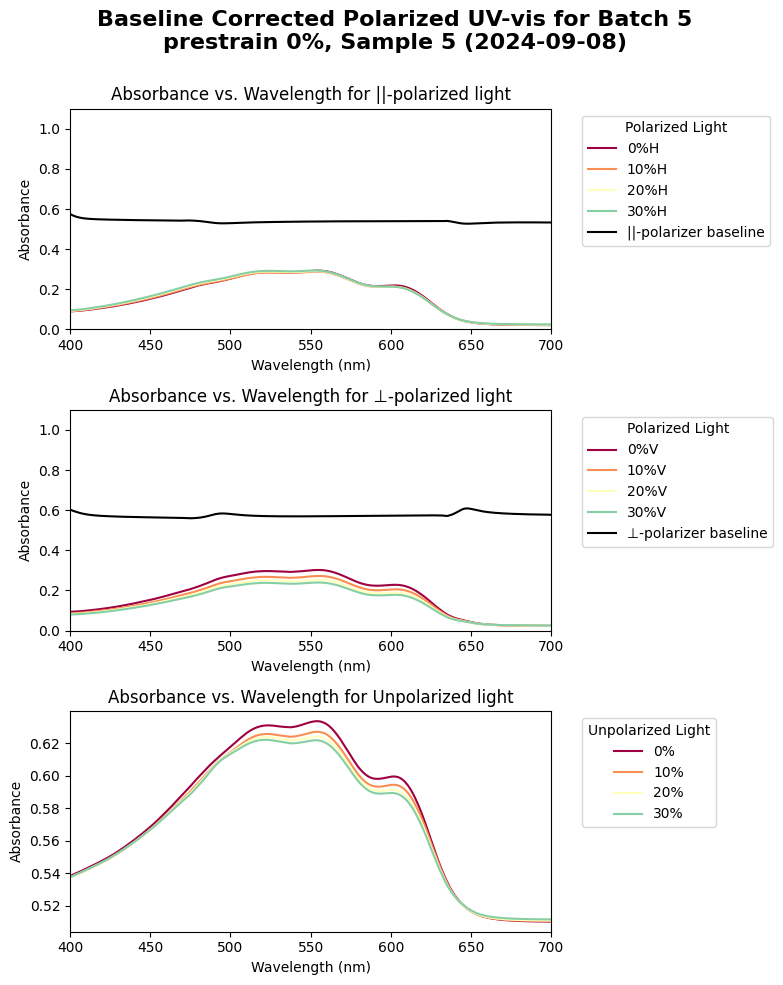

In [151]:
##### plotting #####

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Set up figure with 3 subplots for polarized and unpolarized UV-vis data
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
fig.suptitle(f'Baseline Corrected Polarized UV-vis for Batch 5\nprestrain 0%, Sample {s_num} ({date})\n', fontsize=16, fontweight='bold')

# Generate colors for plotting
colors = cm.Spectral([i / ((df.shape[1] - 3)//3) for i in range((df.shape[1] - 1)//3)])
print(((df.shape[1] - 3)//3))
# Plot Vertical Absorbance (columns with 'H' wichic are parrallel to strain)
for i, column in enumerate([col for col in df.columns if 'H' in col and 'baseline' not in col]):
    axs[0].plot(df['Wavelength'], df[column], label=column, color=colors[i])
axs[0].plot(df['Wavelength'], df['H_baseline'], label='||-polarizer baseline', color='k')
axs[0].set_title('Absorbance vs. Wavelength for ||-polarized light')
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Absorbance')
axs[0].set_xlim((400, 700))
axs[0].set_ylim((0, 1.1))
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Horizontal Absorbance (columns with 'V' which are perp to strain)
for i, column in enumerate([col for col in df.columns if 'V' in col and 'baseline' not in col]):
    axs[1].plot(df['Wavelength'], df[column], label=column, color=colors[i])
axs[1].plot(df['Wavelength'], df['V_baseline'], label='⊥-polarizer baseline', color='k')
axs[1].set_title('Absorbance vs. Wavelength for ⊥-polarized light')
axs[1].set_xlabel('Wavelength (nm)')
axs[1].set_ylabel('Absorbance')
axs[1].set_xlim((400, 700))
axs[1].set_ylim((0, 1.1))
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Unpolarized Absorbance (columns without 'H' or 'V')
for i, column in enumerate([col for col in df.columns if 'H' not in col and 'V' not in col and 'Wavelength' not in col and 'baseline' not in col]):
    axs[2].plot(df['Wavelength'], df[column], label=column, color=colors[i])

axs[2].set_title('Absorbance vs. Wavelength for Unpolarized light')
axs[2].set_xlabel('Wavelength (nm)')
axs[2].set_ylabel('Absorbance')
axs[2].set_xlim((400, 700))
# axs[2].set_ylim((0, 1))
axs[2].legend(title='Unpolarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
